# Comparisons, Masks, and Boolean Logic

# A. Example: Counting Rainy Days

In [2]:
import numpy as np
from vega_datasets import data

In [3]:
rainfall_mm = np.array(data.seattle_weather().set_index('date')['precipitation']['2015']
                       )
rainfall_mm

array([ 0. ,  1.5,  0. , 10.2,  8.1,  0. ,  0. ,  0. ,  0.3,  5.8,  1.5,
        0. ,  0. ,  0. ,  9.7,  0. , 26.2, 21.3,  0.5,  0. ,  0. ,  0.8,
        5.8,  0.5,  0. ,  0. ,  0.8,  0. ,  0. ,  0. ,  0. ,  1.5,  7.4,
        1.3,  8.4, 26.2, 17.3, 23.6,  3.6,  6.1,  0.3,  0. ,  1. ,  0. ,
        0.3,  0. ,  0. ,  0. ,  0. ,  4.6,  0.8,  0. ,  0. ,  0. ,  0. ,
        4.1,  9.4, 18.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0.8,  2.5,  0. ,  2. , 17. , 55.9,  1. ,  0.8,  0. ,
        0. ,  4.1,  3.8,  1. ,  8.1,  7.6,  5.1,  0. ,  1. ,  0. ,  0. ,
        1.8,  1. ,  5.1,  0. ,  1.5,  0. ,  0. ,  1. ,  0.5,  0. ,  0. ,
       10.9,  0. ,  0. , 14. ,  3.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        5.6,  0. ,  3. ,  3.3,  1.3,  0. ,  0.3,  1.8,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  6.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  4.3,
        4.1,  0.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0

In [4]:
len(rainfall_mm)

365

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

C:\Users\JCA\AppData\Local\Temp\ipykernel_15644\2079592702.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


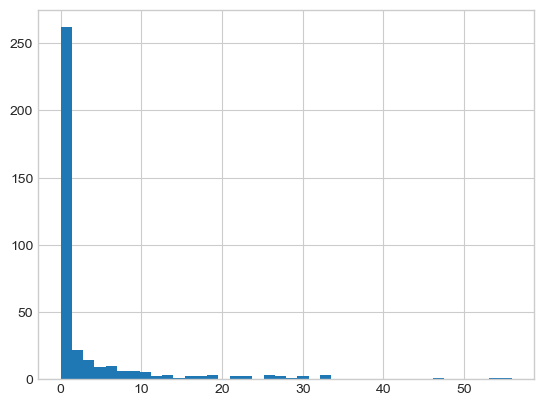

In [8]:
plt.hist(rainfall_mm, 40);

# B. Comparison Operators as Ufuncs

In [9]:
x = np.array([1, 2, 3, 4, 5])


In [10]:
x <3

array([ True,  True, False, False, False])

In [11]:
x >3

array([False, False, False,  True,  True])

In [12]:
x <= 3

array([ True,  True,  True, False, False])

In [13]:
x >= 3

array([False, False,  True,  True,  True])

In [14]:
x != 3

array([ True,  True, False,  True,  True])

In [15]:
x == 3

array([False, False,  True, False, False])

In [16]:
(2*x) == (x**2)

array([False,  True, False, False, False])

# C. Working with Boolean Arrays